##### https://wikidocs.net/book/587 봄!!
# Linear Regression
## 1) Univariate Linear Regression


- 선형관계 : y = ax+b , x의 변화량 만큼이 그대로 y에 a배되어 전달되는 것! b는 중요하지 않다!! 

<img src='linear_Reg.PNG' />

Linear regression은 바로 주어진 데이터를 나타내는 최적의 직선을 찾아냄으로써 input (x)와 output (y) 사이의 관계를 도출해내는 과정이다. 


Hypothesis 란, input (feature)과 output (target) 의 관계를 나타내는 함수이다. Output 값이 나오게 하는 '진짜' 변수들과 그 변수와 output 사이의 관계식을 정의하는 '진짜' 관계식을 찾아내는 것은 불가능하다.

hθ(x)=θ0+θ1x // θ0, θ1 계수라고 한다. θ1 = W 라고도 한다!! 

### Cost function

비용함수 여러가지 있다,

여기서는 평균제곱오차(MSE) 이용. 

<img src="minimize.PNG"  />
<img src="minimize2.PNG" />
<img src="minimize_goal.PNG" />

### Intuition I

<img src = "intuition.PNG" />

- 기울기: x변화량에 대한 y변화량
- 점의 이동을 기울기를 통해서 알 수 있다!!
- 기울기가 1이라고 하면 x가 1만큼 이동하면 y가 1만큼 이동한 다고 말할 수 있다. 

### Intuition II

<img src="intuition2.PNG" />

- concave(위로 볼록) VS convex(아래로 볼록) [bowl shaped]

- convex 하는 것이 비용함수에서 보장되어야 한다. global minimum을 찾아야 하나까!!  

## 2) Parameter Learning (Gradient Descent)

Gradient ascent도 있다. 올라가는 거지!! 

### Gradient Descent

hypothesis function의 최적의 parameter를 찾는 방법을 공부하도록 한다.
Gradient descent는 cost function을 최소화하기 위해 이용할 수 있는 방법 중 하나이며, cost function 말고도 각종 optimization에 이용되는 일반적인 방법이다.

Gradient Descent Outline
1. start with some θ0,θ1θ0,θ1 (say θ0=0,θ1=0θ0=0,θ1=0)
2. Keep changing θ0,θ1θ0,θ1 to reduce J(θ0,θ1)J(θ0,θ1) until we hopefully end up at minimum

### Gradient Descent Algorithm


repeat until convergence{ 

$
\theta_j \color{limegreen}{:=} \theta_j - \color{salmon}{\alpha} \frac{\partial}{\partial \theta_j} J(\theta_0. \theta_1) \quad \text{for } \color{goldenrod}{j=0, j=1}
$

}

<img src="GDAlgorithm.PNG" />

상수 α>0 는 learning rate이라고 한다. 이 크기가 클수록 한번에 더 많이 움직이게 되는 것이다.

편미분항 $\color{royalblue}{\frac{\partial}{\partial \theta_j} J(\theta_0. \theta_1)}$는 다음에 이동할 방향과 크기를 결정한다.

<img src="learning rate.PNG" />

만약 learning rate αα 가 너무 작으면 수렴하는데에 오래걸리는 문제가 발생하고, 너무 크면 최소값에 이르지 못해 수렴하지 못하거나 심지어 발산하는 문제가 발생할 수 있다. 그러므로 적절한 learning rate을 고르는 것이 중요하다.

<img src="properlearning_rate.PNG" />

Gradient descent가 local optima (slope=0)에 이르면 편미분항이 0이 되므로 주의해야 한다!! 

대부분의 경우 최적값에 수렴할수록 편미분항의 크기가 점점 작아져서 조금씩 업데이트되기 때문에 α 값을 수동으로 조절하지 않아도 된다.

<img src="linreg703.PNG" />

## Gradient Descent for Linear Regression


Linear regression에서 정의한 cost function을 Gradient Descent의 $J(\theta_0, \theta_1)$에 대입하기만 하면 된다.

$
\begin{equation}
\begin{split}
    \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1) 
    &= \frac{\partial}{\partial \theta_j} 
        \left[ \frac{1}{2m} \sum_{i=1}^{m} 
            \left(  h_\theta(x^{(i)})-y^{(i)}  \right)^2 \right] \\
    &= \frac{\partial}{\partial \theta_j}
        \left[ \frac{1}{2m} \sum_{i=1}^{m} 
            \left(  \theta_0 + \theta_1 x^{(i)} - y^{(i)}  \right)^2 \right] \\
\end{split}
\end{equation}
$

위 구할 수 있지!!  

$\theta_0, \theta_1$ 에 대해서 각각 편미분!! 

<img src="pseudo-code.PNG" />

In [9]:
def dh(theta0, theta1):
    return theta0 + theta1

In [10]:
theta0, theta1 = 1, 1

In [16]:
temp0 = theta0 - dh(theta0, theta1)
temp1 = theta1 - dh(theta1, theta1)
theta0, theta1 = temp0, temp1
theta0, theta1
# 임시값을 사용해서 값 변화에 주의해야 한다!! 

(1, 1)

## 3) Multivariate Linear Regression


여러 개의 변수를 이용한 multivariate linear regression

$\Rightarrow h_\theta(x)=\theta_0 + \theta_1 x_1 +\theta_2 x_2 + ... + \theta_n x_n$

$\Rightarrow h_\theta(x)=\theta_0 x_0 + \theta_1 x_1 +\theta_2 x_2 + ... + \theta_n x_n$

↑ 프로그래밍을 행렬 계산을 위해 후자 처럼 쓰기도 한다!! 

$
h_\theta(x)=
\begin{bmatrix}
    \theta_0 & \theta_1 & ... & \theta_n
\end{bmatrix}
\begin{bmatrix}
    x_0 \\ x_1 \\ \vdots \\ x_n
\end{bmatrix}
= \theta^{T}x
$



$
X=
\begin{bmatrix}
    x_0^{(1)} & x_1^{(1)} \\
    x_0^{(2)} & x_1^{(2)} \\
    x_0^{(3)} & x_1^{(3)} 
\end{bmatrix}
,
\quad
\theta=
\begin{bmatrix}
    \theta_0 \\ \theta_1
\end{bmatrix}
$

So, $h_\theta(X) = X\theta$

### Gradient Descent for Multiple Variables


Gradient descent는 변수가 하나일 때와 기본적으로 같은 꼴이지만 nn개 feature에 대하여 반복한다는 점이 다를 뿐이다.

즉 n=1 인 경우, 다음과 같이 update하였다.
Repeat until convergence{

$
\theta_0 := \theta_0 - \alpha \color{royalblue}{\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)}
= \theta_0 - \alpha \color{royalblue}{\frac{1}{m} \sum_{i=1}^{m} \left( h_\theta( x^{(i)}) - y^{(i)} \right)}
$

$
\theta_1 := \theta_1 - \alpha \color{royalblue}{\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)}
= \theta_1 - \alpha \color{royalblue}{\frac{1}{m} \sum_{i=1}^{m} \left( h_\theta( x^{(i)}) - y^{(i)} \right) x^{(i)} }
$


} simultaneously update $\theta_0, \theta_1$

이제 $n \geq 1$ 인 경우에 대하여 적어 보자.

Repeat until convergence{

$
\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, ..., \theta_n)
= \theta_j - \alpha\frac{1}{m} \sum_{i=1}^{m} \left( h_\theta( x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$

} simultaneously update for every j=0,...,n

이를 각 parameter별로 풀어 쓸 수 있다!! 

### Matrix Notation


The gradient descent rule can be expressed as:

$\theta := \theta - \alpha \nabla J(\theta)$

where $\nabla J(\theta)$ is a column vector of the form:

$
\nabla J(\theta)=
\begin{bmatrix}
    \frac{\partial J(\theta)}{\partial \theta_0} \\
    \frac{\partial J(\theta)}{\partial \theta_1} \\
    \vdots \\
    \frac{\partial J(\theta)}{\partial \theta_n} 
\end{bmatrix}
$

The j-th component of the gradient is the summation of the product of two terms

$
\begin{equation}
\begin{split}
\frac{\partial J(\theta)}{\partial \theta_j} 
&=  \frac{1}{m} \sum_{i=1}^{m}  \left( h_\theta(x^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)}  \\
&= \frac{1}{m} \sum_{i=1}^{m}   x_j^{(i)} \cdot \left(h_\theta(x^{(i)}) - y^{(i)}  \right) 
\end{split}
\end{equation}
$

Sometimes, the summation of the product of two terms can be expressed as the product of two vectors.

Here, $x_j^{(i)}$, for $i=1,...,m$ represents the mm elements of the j-th column, $x_j$ of the training set $X$.

The other term $\left( h_\theta(x^{(i)}) - y^{(i)} \right)$ is the vector of the deviations between the predictions $h_\theta(x^{(i)})$ and the true values $y^{(i)}$. Re-writing $\frac{\partial J(\theta)}{\partial \theta_j}$, we have:

$
\begin{equation}
\begin{split}
    \frac{\partial J(\theta)}{\partial \theta_j} &= \frac1m  \vec{x_j}^{T} (X\theta - \vec{y}) \\
    \nabla J(\theta) & =  \frac 1m X^{T} (X\theta - \vec{y}) 
\end{split}
\end{equation}
$

Finally, the matrix notation (vectorized) of the gradient descent rule is:

$
\theta := \theta - \frac{\alpha}{m} X^{T} (X\theta - \vec{y})
$

## 4) Gradient Descent in Practice


### Feature Scaling

모든 feature가 비슷한 범위에 있으면 gradient descent가 더 빠르게 수렴하는 데에 도움이 된다.

### Mean normalization


Replace $x_i$ with $(x_i - \mu_i) / sd_i $ to make features have approximately zero mean (Do not apply to $x_0 =1$ )

### Learning Rate


$Gradient descent 가 제대로 작동을 안한다면, $α$ 값을 줄이자.$

Andrew Ng 는 $α$ 값을 3씩 곱하거나 나누며 조절하는 것을 추천하였다.

## 5) Features and Polynomial Regression
몇가지 feature 와 hypothesis function 개선 방법을 알아보자.



### New Feature
여러개 feature를 하나로 합쳐서 새로운 feature로 이용할 수 있다. 


### Polynomial Regression
Hypothesis function이 반드시 linear (직선)이어야하는 것은 아니다. 데이터에 잘 fit하는 형태로 나타내면 된다. 예를들면 2차함수나 3차함수 곡선, 또는 제곱근 함수 등의 형태를 이용할 수 있다.

<img src="muti602.PNG" />

주의할 점은, 이렇게 feature를 만들면 feature scaling이 더욱 중요해진다는 점이다. 
예를 들어, $x_1$의 원래 범위가 1~1000이라면, $x^2_1$의 범위는 1~1000000이 되고, $x^3_1$의 범위는 1~1000000000이 되어버린다.

- 급, 머신러닝 인 액션 책
### 8.2 지역적 가중치가 부여된 선형 회귀

In [19]:
import regression

In [20]:
xArr, yArr = regression.loadDataSet('ex0.txt')

In [21]:
yArr[0]

3.176513

In [22]:
regression.lwlr(xArr[0], xArr, yArr, 1.0)

matrix([[ 3.12204471]])

In [23]:
regression.lwlr(xArr[0], xArr, yArr, 0.001)

matrix([[ 3.20175729]])

In [24]:
yHat = regression.lwlrTest(xArr, xArr, yArr, 0.003)

In [26]:
import numpy as np

In [27]:
xMat = np.mat(xArr)

In [28]:
strInd = xMat[:, 1].argsort(0)

In [30]:
xSort = xMat[strInd][:,0,:]

In [31]:
import matplotlib.pyplot as plt

In [32]:
fig = plt.figure()

In [33]:
ax = fig.add_subplot(111)

In [34]:
ax.plot(xSort[:,1], yHat[strInd])

In [36]:
ax.scatter(xMat[:,1].flatten().A[0], np.mat(yArr).T.flatten().A[0],s=2,c='red')

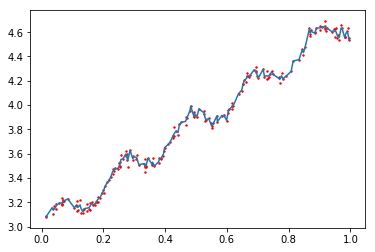

In [37]:
plt.show()